In [31]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [32]:
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("Dynamiczne zarządzanie pamięcią GPU włączone")
    except RuntimeError as e:
        print(e)

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

Dynamiczne zarządzanie pamięcią GPU włączone


In [33]:
from src.preprocessing.preprocessing import load_and_split_data_for_vgg16, NUM_CLASSES 
from src.models.model_definition import create_vgg16_transfer_model, unfreeze_last_n_layers

In [34]:
BATCH_SIZE = 32
train_ds, val_ds, test_ds, ds_info = load_and_split_data_for_vgg16(batch_size=BATCH_SIZE)

In [35]:
model = create_vgg16_transfer_model(input_shape=(224, 224, 3))
model.summary()

Model: "VGG16_Custom_Head"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_2  (None, 512)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_6 (Dense)             (None, 1024)              525312    
                                                                 
 batch_normalization_4 (Bat  (None, 1024)              4096      
 chNormalization)                                                
                                                                 
 dropout_4 (Dropout)         (None, 1024)              0         
                                                                 
 dense_7 (Dense)             (None, 512)         

In [36]:
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=5,        
    restore_best_weights=True
)


In [37]:
model_checkpoint = ModelCheckpoint(
    filepath='models/best_vgg16_8class.h5', 
    monitor='val_accuracy', 
    mode='max', 
    save_best_only=True
)

In [38]:
with tf.device('/GPU:0'):
    history1 = model.fit(
        train_ds,
        epochs=20,
        validation_data=val_ds,
        callbacks=[early_stopping, model_checkpoint]
    )
model.save('models/final_stage1_vgg16_8class.h5')

Epoch 1/20


2026-01-12 14:04:13.572418: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:9394: Filling up shuffle buffer (this may take a while): 907 of 1000
2026-01-12 14:04:14.532234: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


    130/Unknown - 58s 345ms/step - loss: 1.4324 - accuracy: 0.6005

2026-01-12 14:05:00.626847: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 12916548112423029933
2026-01-12 14:05:00.626918: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 381129622446512017


131/131 [==============================] - 70s 432ms/step - loss: 1.4344 - accuracy: 0.6004 - val_loss: 1.5248 - val_accuracy: 0.6963
Epoch 2/20


2026-01-12 14:05:22.285877: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:9394: Filling up shuffle buffer (this may take a while): 906 of 1000
2026-01-12 14:05:23.261212: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


131/131 [==============================] - 66s 421ms/step - loss: 0.9339 - accuracy: 0.6940 - val_loss: 0.6491 - val_accuracy: 0.7927
Epoch 3/20


2026-01-12 14:06:28.715481: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:9394: Filling up shuffle buffer (this may take a while): 989 of 1000
2026-01-12 14:06:28.828348: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


131/131 [==============================] - 65s 420ms/step - loss: 0.8561 - accuracy: 0.7183 - val_loss: 0.6687 - val_accuracy: 0.7759
Epoch 4/20


2026-01-12 14:07:34.186040: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:9394: Filling up shuffle buffer (this may take a while): 925 of 1000
2026-01-12 14:07:35.032028: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


131/131 [==============================] - 70s 451ms/step - loss: 0.7660 - accuracy: 0.7466 - val_loss: 0.5888 - val_accuracy: 0.8115
Epoch 5/20


2026-01-12 14:08:44.383704: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:9394: Filling up shuffle buffer (this may take a while): 971 of 1000
2026-01-12 14:08:44.741831: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


131/131 [==============================] - 67s 431ms/step - loss: 0.7628 - accuracy: 0.7471 - val_loss: 0.5721 - val_accuracy: 0.8115
Epoch 6/20


2026-01-12 14:09:51.517593: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:9394: Filling up shuffle buffer (this may take a while): 955 of 1000
2026-01-12 14:09:52.008303: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


131/131 [==============================] - 69s 446ms/step - loss: 0.7257 - accuracy: 0.7586 - val_loss: 0.6139 - val_accuracy: 0.8010
Epoch 7/20


2026-01-12 14:11:00.705651: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:9394: Filling up shuffle buffer (this may take a while): 975 of 1000
2026-01-12 14:11:00.981701: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


131/131 [==============================] - 68s 438ms/step - loss: 0.7094 - accuracy: 0.7620 - val_loss: 0.5788 - val_accuracy: 0.8136
Epoch 8/20
131/131 [==============================] - 66s 425ms/step - loss: 0.6973 - accuracy: 0.7577 - val_loss: 0.5290 - val_accuracy: 0.8262
Epoch 9/20


2026-01-12 14:13:14.464780: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:9394: Filling up shuffle buffer (this may take a while): 962 of 1000
2026-01-12 14:13:14.857121: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


131/131 [==============================] - 66s 425ms/step - loss: 0.6704 - accuracy: 0.7745 - val_loss: 0.5280 - val_accuracy: 0.8293
Epoch 10/20


2026-01-12 14:14:20.827256: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:9394: Filling up shuffle buffer (this may take a while): 923 of 1000
2026-01-12 14:14:21.579130: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


131/131 [==============================] - 67s 426ms/step - loss: 0.6660 - accuracy: 0.7735 - val_loss: 0.6219 - val_accuracy: 0.8136
Epoch 11/20


2026-01-12 14:15:27.637393: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:9394: Filling up shuffle buffer (this may take a while): 923 of 1000
2026-01-12 14:15:28.487488: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


131/131 [==============================] - 68s 427ms/step - loss: 0.6762 - accuracy: 0.7699 - val_loss: 0.5159 - val_accuracy: 0.8220
Epoch 12/20


2026-01-12 14:16:36.332489: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:9394: Filling up shuffle buffer (this may take a while): 891 of 1000
2026-01-12 14:16:37.618612: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


131/131 [==============================] - 68s 427ms/step - loss: 0.6392 - accuracy: 0.7764 - val_loss: 0.5154 - val_accuracy: 0.8346
Epoch 13/20


2026-01-12 14:17:43.827381: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:9394: Filling up shuffle buffer (this may take a while): 860 of 1000
2026-01-12 14:17:45.607451: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


131/131 [==============================] - 68s 428ms/step - loss: 0.6506 - accuracy: 0.7719 - val_loss: 0.4946 - val_accuracy: 0.8346
Epoch 14/20


2026-01-12 14:18:51.923077: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:9394: Filling up shuffle buffer (this may take a while): 908 of 1000
2026-01-12 14:18:52.912932: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


131/131 [==============================] - 68s 431ms/step - loss: 0.6176 - accuracy: 0.7817 - val_loss: 0.5068 - val_accuracy: 0.8429
Epoch 15/20


2026-01-12 14:19:59.519113: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:9394: Filling up shuffle buffer (this may take a while): 850 of 1000
2026-01-12 14:20:01.393948: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


131/131 [==============================] - 68s 427ms/step - loss: 0.6194 - accuracy: 0.7884 - val_loss: 0.5298 - val_accuracy: 0.8304
Epoch 16/20


2026-01-12 14:21:07.595250: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:9394: Filling up shuffle buffer (this may take a while): 861 of 1000
2026-01-12 14:21:09.269094: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


131/131 [==============================] - 68s 425ms/step - loss: 0.5829 - accuracy: 0.7978 - val_loss: 0.5411 - val_accuracy: 0.8199
Epoch 17/20


2026-01-12 14:22:15.335861: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:9394: Filling up shuffle buffer (this may take a while): 861 of 1000
2026-01-12 14:22:16.983059: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


131/131 [==============================] - 68s 429ms/step - loss: 0.6147 - accuracy: 0.7889 - val_loss: 0.5370 - val_accuracy: 0.8199
Epoch 18/20


2026-01-12 14:23:23.506763: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:9394: Filling up shuffle buffer (this may take a while): 901 of 1000
2026-01-12 14:23:24.544566: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


131/131 [==============================] - 64s 402ms/step - loss: 0.5893 - accuracy: 0.7870 - val_loss: 0.5310 - val_accuracy: 0.8230


In [39]:
model = tf.keras.models.load_model('models/best_vgg16_8class.h5')

model = unfreeze_last_n_layers(model, fine_tune_at=4, lr=1e-5)
model.summary()

Model: "VGG16_Custom_Head"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_2  (None, 512)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_6 (Dense)             (None, 1024)              525312    
                                                                 
 batch_normalization_4 (Bat  (None, 1024)              4096      
 chNormalization)                                                
                                                                 
 dropout_4 (Dropout)         (None, 1024)              0         
                                                                 
 dense_7 (Dense)             (None, 512)         

In [40]:
with tf.device('/GPU:0'):
    history2 = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=50,
        initial_epoch=history1.epoch[-1]+1,
        callbacks=[early_stopping, model_checkpoint]
    )
model.save('models/final_vgg16_8class.h5')

Epoch 19/50


2026-01-12 14:30:50.397955: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:9394: Filling up shuffle buffer (this may take a while): 903 of 1000
2026-01-12 14:30:51.352988: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


131/131 [==============================] - 68s 414ms/step - loss: 0.5361 - accuracy: 0.8146 - val_loss: 0.4807 - val_accuracy: 0.8387
Epoch 20/50


2026-01-12 14:31:56.739659: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:9394: Filling up shuffle buffer (this may take a while): 978 of 1000
2026-01-12 14:31:56.958430: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


131/131 [==============================] - 65s 416ms/step - loss: 0.4978 - accuracy: 0.8317 - val_loss: 0.4573 - val_accuracy: 0.8513
Epoch 21/50
131/131 [==============================] - 64s 414ms/step - loss: 0.4621 - accuracy: 0.8391 - val_loss: 0.4672 - val_accuracy: 0.8461
Epoch 22/50


2026-01-12 14:34:05.962004: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:9394: Filling up shuffle buffer (this may take a while): 925 of 1000
2026-01-12 14:34:06.670240: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


131/131 [==============================] - 66s 420ms/step - loss: 0.4478 - accuracy: 0.8441 - val_loss: 0.4570 - val_accuracy: 0.8492
Epoch 23/50


2026-01-12 14:35:11.898427: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:9394: Filling up shuffle buffer (this may take a while): 981 of 1000
2026-01-12 14:35:12.071525: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


131/131 [==============================] - 66s 424ms/step - loss: 0.4181 - accuracy: 0.8525 - val_loss: 0.4320 - val_accuracy: 0.8639
Epoch 24/50


2026-01-12 14:36:17.826484: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:9394: Filling up shuffle buffer (this may take a while): 983 of 1000
2026-01-12 14:36:17.981980: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


131/131 [==============================] - 66s 426ms/step - loss: 0.4018 - accuracy: 0.8595 - val_loss: 0.4305 - val_accuracy: 0.8660
Epoch 25/50


2026-01-12 14:37:23.991668: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:9394: Filling up shuffle buffer (this may take a while): 978 of 1000
2026-01-12 14:37:24.211833: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


131/131 [==============================] - 66s 420ms/step - loss: 0.3789 - accuracy: 0.8658 - val_loss: 0.4137 - val_accuracy: 0.8670
Epoch 26/50


2026-01-12 14:38:29.661931: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:9394: Filling up shuffle buffer (this may take a while): 985 of 1000
2026-01-12 14:38:29.818762: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


131/131 [==============================] - 65s 413ms/step - loss: 0.3776 - accuracy: 0.8696 - val_loss: 0.4268 - val_accuracy: 0.8618
Epoch 27/50


2026-01-12 14:39:34.266006: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:9394: Filling up shuffle buffer (this may take a while): 901 of 1000
2026-01-12 14:39:35.400829: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


131/131 [==============================] - 68s 432ms/step - loss: 0.3501 - accuracy: 0.8838 - val_loss: 0.3949 - val_accuracy: 0.8775
Epoch 28/50


2026-01-12 14:40:42.203607: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:9394: Filling up shuffle buffer (this may take a while): 985 of 1000
2026-01-12 14:40:42.355582: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


131/131 [==============================] - 62s 398ms/step - loss: 0.3278 - accuracy: 0.8869 - val_loss: 0.3915 - val_accuracy: 0.8743
Epoch 29/50


2026-01-12 14:41:44.530801: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:9394: Filling up shuffle buffer (this may take a while): 886 of 1000
2026-01-12 14:41:45.617162: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


131/131 [==============================] - 63s 398ms/step - loss: 0.3269 - accuracy: 0.8845 - val_loss: 0.3976 - val_accuracy: 0.8754
Epoch 30/50


2026-01-12 14:42:48.000485: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:9394: Filling up shuffle buffer (this may take a while): 874 of 1000
2026-01-12 14:42:49.328869: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


131/131 [==============================] - 64s 397ms/step - loss: 0.3324 - accuracy: 0.8881 - val_loss: 0.4008 - val_accuracy: 0.8764
Epoch 31/50


2026-01-12 14:43:51.794853: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:9394: Filling up shuffle buffer (this may take a while): 882 of 1000
2026-01-12 14:43:53.028098: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


131/131 [==============================] - 64s 398ms/step - loss: 0.2923 - accuracy: 0.9054 - val_loss: 0.4079 - val_accuracy: 0.8723
Epoch 32/50
131/131 [==============================] - 64s 410ms/step - loss: 0.2832 - accuracy: 0.9085 - val_loss: 0.4141 - val_accuracy: 0.8681
Epoch 33/50
131/131 [==============================] - 64s 410ms/step - loss: 0.2574 - accuracy: 0.9121 - val_loss: 0.4064 - val_accuracy: 0.8660


In [41]:
model.save('models/final_vgg16_8class_compressed.h5', include_optimizer=False)
model.summary()

Model: "VGG16_Custom_Head"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_2  (None, 512)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_6 (Dense)             (None, 1024)              525312    
                                                                 
 batch_normalization_4 (Bat  (None, 1024)              4096      
 chNormalization)                                                
                                                                 
 dropout_4 (Dropout)         (None, 1024)              0         
                                                                 
 dense_7 (Dense)             (None, 512)         

In [42]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Trening Accuracy')
    plt.plot(epochs_range, val_acc, label='Walidacja Accuracy')
    plt.legend(loc='lower right')
    plt.title('Dokładność (Accuracy)')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Trening Loss')
    plt.plot(epochs_range, val_loss, label='Walidacja Loss')
    plt.legend(loc='upper right')
    plt.title('Strata (Loss)')
    plt.grid(True)
    
    plt.show()

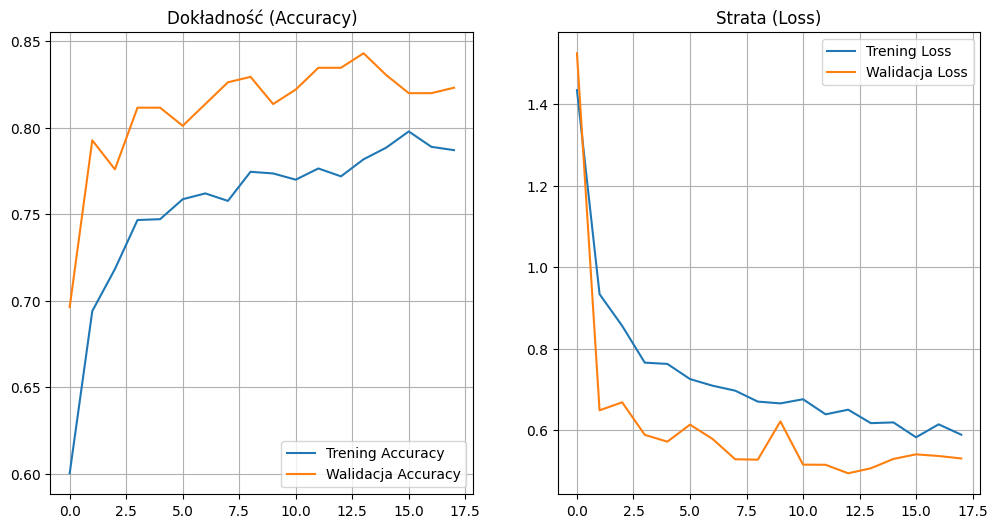

In [43]:
plot_training_history(history1)

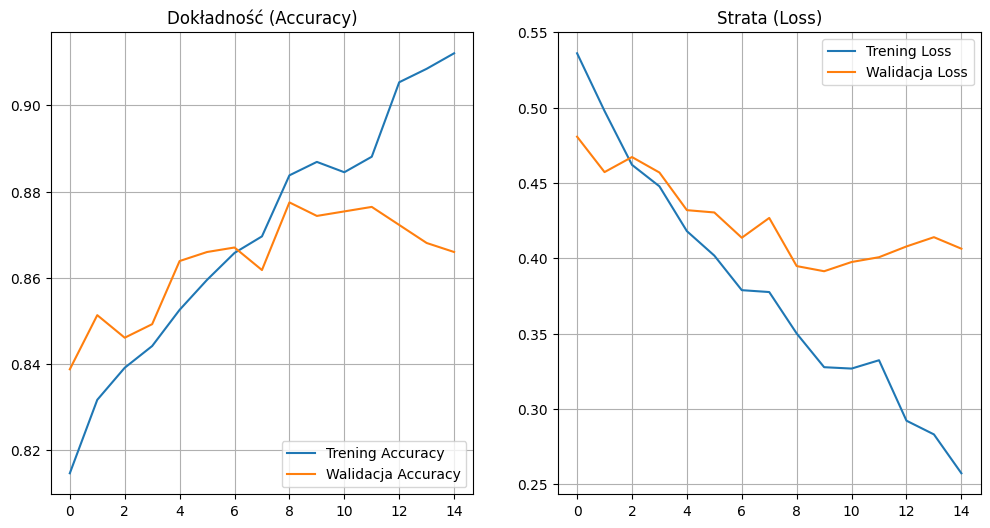

In [44]:
plot_training_history(history2)